In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Read data and draw some figures
import json

# Open and read the JSON file
with open('Efficient_Innovators.json', 'r') as file:
    data = json.load(file)

# Print the data
#print(data)

In [3]:
#import networkx as nx


# Create a graph
G = nx.DiGraph()

# Create nodes
counter = 0
for element in data:
    #print(element)
    G.add_nodes_from([(counter, element)])
    counter += 1

#G.add_nodes_from(data)

#print(G.nodes)

donor_recipient_compatibility = {'O': ['O', 'A', 'B', 'AB'], 'A': ['A', 'AB'], 'B':['B', 'AB'], 'AB':['AB']}

# Create edges (relations)
for node in G.nodes:
    donors = G.nodes[node]['Donor']
    #print(donors)
    for donor in donors:
        for vertex in G.nodes:
            if node == vertex: continue
            recipient = G.nodes[vertex]['Recipient']
            if recipient not in donor_recipient_compatibility[donor]: continue
            G.add_edge(node, vertex)    
                
print('edges:', G.edges)    

edges: [(0, 6), (0, 9), (0, 11), (0, 20), (0, 22), (0, 26), (0, 34), (0, 38), (0, 41), (0, 42), (0, 44), (0, 49), (0, 51), (0, 53), (0, 56), (0, 58), (0, 59), (0, 72), (0, 88), (0, 93), (0, 94), (0, 104), (0, 114), (0, 116), (0, 122), (0, 124), (0, 125), (0, 127), (0, 128), (0, 129), (0, 131), (0, 135), (0, 136), (0, 142), (0, 148), (0, 155), (0, 157), (0, 158), (0, 160), (0, 163), (0, 166), (0, 171), (0, 177), (0, 182), (0, 184), (0, 188), (0, 192), (0, 193), (0, 197), (0, 199), (0, 200), (0, 201), (0, 202), (0, 203), (0, 205), (0, 208), (0, 213), (0, 219), (0, 222), (0, 223), (0, 224), (0, 226), (0, 232), (0, 233), (0, 235), (0, 241), (0, 242), (0, 245), (0, 246), (0, 248), (0, 250), (0, 251), (0, 258), (0, 263), (0, 264), (0, 265), (0, 267), (0, 274), (0, 276), (0, 277), (0, 279), (0, 281), (0, 284), (0, 285), (0, 286), (0, 287), (0, 303), (0, 304), (0, 305), (0, 306), (0, 309), (0, 310), (0, 314), (0, 315), (0, 321), (0, 325), (0, 330), (0, 335), (0, 340), (0, 341), (0, 342), (0, 3

In [4]:
# Visualize the graph, for fun
#import matplotlib.pyplot as plt
#pos = nx.circular_layout(G)
#nx.draw(G, pos, with_labels = True, connectionstyle="arc3,rad=0.1")

In [5]:
# Find cycles of length 3

potential_cycle_3 = []

H = G.to_undirected()

for (u,v) in H.edges:
    for k in nx.common_neighbors(H, u, v):
        potential_cycle_3.append((u,v,k))
        
#print("potential_cycle_3:", potential_cycle_3)        
        
cycle_3 = [] 

for (u,v,k) in potential_cycle_3:
    if (u,v) in G.edges and (v,k) in G.edges and (k,u) in G.edges:
        cycle_3.append((u,v,k,u))
    if (v,u) in G.edges and (u,k) in G.edges and (k,v) in G.edges: 
        cycle_3.append((v,u,k,v))

print("cycle_3:", cycle_3) 

cycle_3: []


In [6]:
# Find cycles of length 2

cycle_2 = []

for (i,j) in G.edges:
    G.edges[(i,j)]["visited"] = False

for (i,j) in G.edges:
    if G.edges[(i,j)]["visited"] == True: continue
    if (j,i) in G.edges:
        cycle_2.append((i,j,i))
        G.edges[(j,i)]["visited"] = True
            
#print("cycles of length 2:", cycle_2)

In [7]:
# Find cycles of length 2

cycle_2 = []

for (u,v) in H.edges:
    if (u,v) in G.edges and (v,u) in G.edges:
        cycle_2.append((u,v,u))
            
print("cycles of length 2:", cycle_2)

cycles of length 2: [(0, 6, 0), (0, 9, 0), (0, 11, 0), (0, 20, 0), (0, 26, 0), (0, 34, 0), (0, 38, 0), (0, 41, 0), (0, 42, 0), (0, 49, 0), (0, 53, 0), (0, 56, 0), (0, 72, 0), (0, 88, 0), (0, 93, 0), (0, 94, 0), (0, 114, 0), (0, 116, 0), (0, 122, 0), (0, 124, 0), (0, 125, 0), (0, 127, 0), (0, 128, 0), (0, 129, 0), (0, 131, 0), (0, 135, 0), (0, 136, 0), (0, 142, 0), (0, 148, 0), (0, 155, 0), (0, 157, 0), (0, 158, 0), (0, 160, 0), (0, 163, 0), (0, 166, 0), (0, 171, 0), (0, 177, 0), (0, 182, 0), (0, 184, 0), (0, 188, 0), (0, 192, 0), (0, 193, 0), (0, 197, 0), (0, 201, 0), (0, 202, 0), (0, 203, 0), (0, 205, 0), (0, 208, 0), (0, 213, 0), (0, 219, 0), (0, 223, 0), (0, 224, 0), (0, 226, 0), (0, 232, 0), (0, 235, 0), (0, 241, 0), (0, 242, 0), (0, 246, 0), (0, 248, 0), (0, 250, 0), (0, 258, 0), (0, 264, 0), (0, 265, 0), (0, 267, 0), (0, 276, 0), (0, 284, 0), (0, 285, 0), (0, 286, 0), (0, 287, 0), (0, 303, 0), (0, 304, 0), (0, 306, 0), (0, 309, 0), (0, 310, 0), (0, 314, 0), (0, 315, 0), (0, 325, 

In [8]:
# Let's find a maximum matching
import gurobipy as gp
from gurobipy import GRB

# Create model object
m = gp.Model()

# Create variable for each edge
x = m.addVars(G.edges, vtype=GRB.BINARY)

# Objective function: maximize number of edges
m.setObjective(gp.quicksum(x[e] for e in G.edges), GRB.MAXIMIZE)

# The number of incomming arcs to each vertex is at most one
m.addConstrs(gp.quicksum(x[(u,v)] for u in G.neighbors(v) if (u,v) in G.edges) <= 1 for v in G.nodes)

# The number of incomming arcs should be equal to the number of outgoing arcs
m.addConstrs(gp.quicksum(x[(u,v)] for u in G.neighbors(v) if (u,v) in G.edges) == gp.quicksum(x[(v,u)] for u in G.neighbors(v) if (v,u) in G.edges) for v in G.nodes)

# Solve
m.optimize()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1255U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1434 rows, 175159 columns and 315703 nonzeros
Model fingerprint: 0x2fe92201
Variable types: 0 continuous, 175159 integer (175159 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 684 rows and 104137 columns
Presolve time: 1.13s
Presolved: 750 rows, 71022 columns, 141669 nonzeros
Variable types: 0 continuous, 71022 integer (71022 binary)

Root relaxation: objective 3.660000e+02, 1865 iterations, 0.50 seconds (0.28 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    B

In [9]:
print("Objective:",m.objVal)

selected_edges = [e for e in G.edges if x[e].X > 0.5]

Objective: 366.0


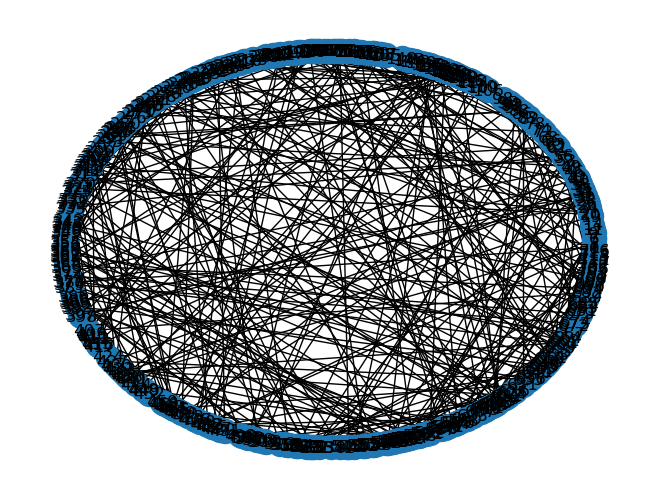

In [11]:
# Visualize the solution
edge_colors = [ "red" if e in selected_edges else "black" for e in G.edges ]

H = nx.Graph()
H.add_edges_from(selected_edges)

pos = nx.circular_layout(G)
nx.draw(H, pos, with_labels = True, connectionstyle="arc3,rad=0.1", edge_color=edge_colors)
